<a href="https://colab.research.google.com/github/jeanhrsouza/data-science-primeiros-passos/blob/main/Introducao_a_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science: Primeiros passos

## 01. Data Science: dados e visualizações

### Analisando as notas em geral

> Conhecendo nossos dados e o Pandas

In [134]:
import pandas as pd

notas = pd.read_csv('ratings.csv')

#mostrar os 5 primeiros elementos
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [135]:
#Verificar os formatos da tabela
notas.shape

(100836, 4)

In [136]:
#trocando os nomes das colunas
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [137]:
#Verificando todos os valores de nota
#(Serie)
notas['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [138]:
#Verificando todos os valores únicos de nota
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

Note que a Serie <font color="green">nota</font> vai de 1 - 5

In [139]:
#Contando os valores de nota
#Perceba que é retornado do que mais aparece para a menor opção
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [140]:
#Verificando a média
notas['nota'].mean()

3.501556983616962

> Visualizando dados com histograma e boxplot

In [141]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

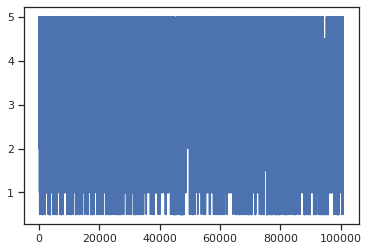

In [142]:
notas.nota.plot()

 O gráfico plot não foi eficiente para esse tipo de análise. Será necessário fazer plot com o tipo <font color="orange">histograma</font>

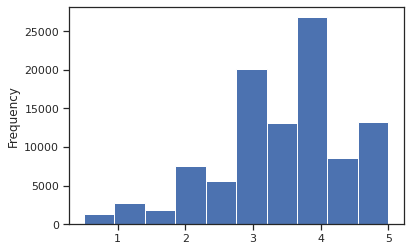

In [143]:
notas.nota.plot(kind='hist')

Identificando a mediana

In [144]:
print(f"Média: {notas['nota'].mean()}")
print(f"Mediana: {notas['nota'].median()}")

Média: 3.501556983616962
Mediana: 3.5


In [145]:
#Verificar diversas medidas para entender os dados
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


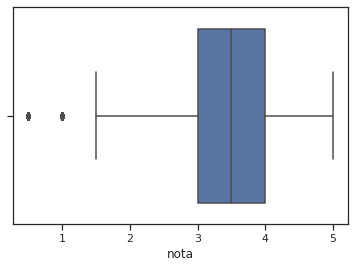

In [146]:
import seaborn as sns

sns.boxplot(notas.nota)

O boxplot é, resumidamente, a forma visual da função <font color="red">describe()</font>

## 02. Análise exploratória

### Olhando os filmes

In [147]:
filmes = pd.read_csv('movies.csv') # Lendo os filmes
filmes.columns = ["filmesId", "titulo", "generos"] #alterando nomes da coluna
filmes.head()

,filmesId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [148]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### Analisando algumas notas específicas por filmes

In [149]:
#retornando a média somente das linhas com o filmeId 01
notas.query("filmeId==1").nota.mean()

3.9209302325581397

In [150]:
#retornando a média somente das linhas com o filmeId 02
notas.query("filmeId==2").nota.mean()

3.4318181818181817

In [151]:
# Agrupando todas as notas pelo filmeId e verificando a média
medias_por_filme = notas.groupby("filmeId").mean()["nota"]
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

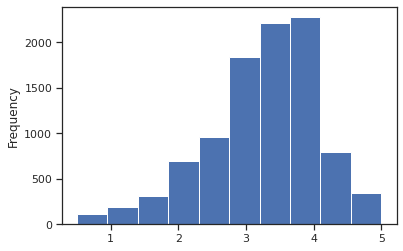

In [152]:
# Verificando as médias por filmes
medias_por_filme.plot(kind='hist')

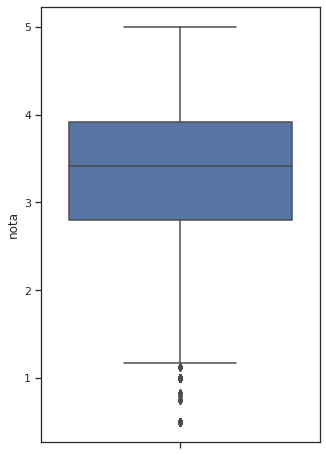

In [153]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))
sns.boxplot(y=medias_por_filme)

In [154]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


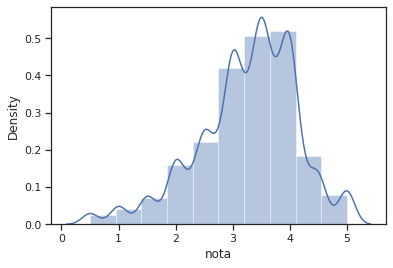

In [155]:
# Gráfico de distribuição
sns.distplot(medias_por_filme, bins = 10)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

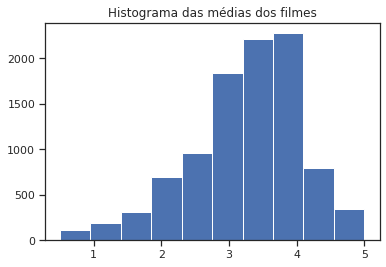

In [156]:

plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")

# 3. Variáveis

Utilizando a base de dados **TMDB 5000 Movie Dataset**

Fonte: https://www.kaggle.com/tmdb/tmdb-movie-metadata

In [157]:
# importando csv
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [158]:
#Verificando os valores das linguas
tmdb.original_language.unique() # (Categórica nominal)

# --------------------------------------------
#Será exibido uma variável categórica 

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

* Primeiro grau [Ensino Fundamental]
* Segundo grau [Ensino Médio]
* Terceiro grau [Ensino Superior]
  * 1 grau < 2 grau < 3 grau (Categórica ordinal)


Na categorica ordinal, <font color='red'>não temos uma soma </font> (1ºgrau + 2ºgrau = 3ºgrau)  

Na categoria ordinal, não temos a facilidade de operar as operações aritméticas


---
No DataFrame tmdb a coluna **budget**  é **quantitativo contínuo** (e no caso é até continuo, podendo ser 0, 500 ou infinitos valores no meio)

---
No DataFrame tmdb a coluna **vote_average**, **quantitativa intervalar** (quantidade de votos é 1, 2 ,3 ou 4. Não tem 2.5 votos)


---
Para saber mais sobre Tipos de variáveis: http://leg.ufpr.br/~silvia/CE055/node8.html

# 4. Data Visualization

In [159]:
#Contando os valores -> exibindo o index
tmdb["original_language"].value_counts().index

Index(['en', 'fr', 'es', 'de', 'zh', 'hi', 'ja', 'it', 'cn', 'ko', 'ru', 'pt',
       'da', 'sv', 'fa', 'nl', 'th', 'he', 'ro', 'ar', 'id', 'cs', 'ta', 'hu',
       'xx', 'vi', 'ps', 'nb', 'pl', 'af', 'no', 'sl', 'ky', 'te', 'is', 'el',
       'tr'],
      dtype='object')

In [160]:
#Contando os valores -> exibindo os valores
tmdb["original_language"].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [161]:
#Contando os valores --> transformando em um data_frame
tmdb["original_language"].value_counts().to_frame()

,original_language
en,4505
fr,70
es,32
de,27
zh,27
hi,19
ja,16
it,14
cn,12
ko,11


In [162]:
#Contando os valores --> transformando em um data_frame E retirando o index
tmdb["original_language"].value_counts().to_frame().reset_index()

,index,original_language
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ko,11


In [163]:
#Contando os valores --> transformando em um data_frame E retirando o index

#Atribuindo a uma variável
contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()

#renomenado
contagem_de_lingua.columns = ["original_language", "total"]

#Exibindo o DF;
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


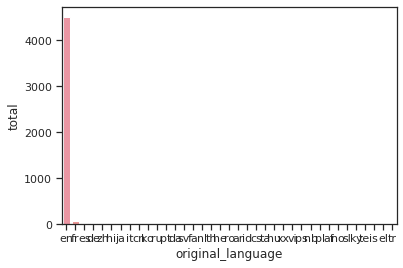

In [164]:
#Visualizando as categorias 
#----------------------------------------------------
#Para comparar as categorias, vamos plotar as categorias
sns.barplot(x="original_language", y="total", data=contagem_de_lingua) #baixo nível

Gráfico do tipo <font color="green">**catplot()**</font> [somente versões 0.9.0 +]

→ Mais alto nível do que o **barplot()**

kind="count" → contar as quantidade do que foi passado por parâmetros

documentação: https://seaborn.pydata.org/generated/seaborn.catplot.html

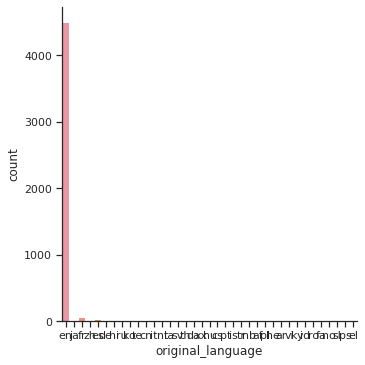

In [165]:
#Plot mais alto nível do que o barplot()

#
sns.catplot(x="original_language", kind="count", data=tmdb)


#Existe muitas informações e não é possível passar a mensagem

([<matplotlib.patches.Wedge at 0x7fef3e79dcd0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'de'),
  Text(1.0773191105706255, -0.22222406260195313, 'zh'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ko'),
  Text(1.0960865535188649, -0.09270527058984593, 'ru'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'fa'),
  Text(1.0990363161210686, -0.04603450713357274, 'nl'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

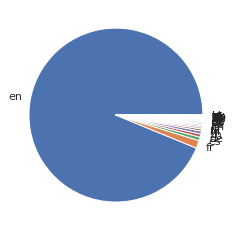

In [166]:
#Gráfico de pizza / torta (Não é recomendado utilizar)
plt.pie(contagem_de_lingua["total"], labels = contagem_de_lingua["original_language"])


#Não é possível passar a mensagem

In [167]:
#Filtrando o total de cada língua
total_por_lingua = tmdb["original_language"].value_counts()

#Criando o total geral 
total_geral = total_por_lingua.sum()

#Localizando as linhas cujo o index tem o valor 'en'
total_de_ingles = total_por_lingua.loc["en"]

#total do resto
total_do_resto = total_geral - total_de_ingles

#Exibindo os valores de inglês e OUTROS
print(total_de_ingles, total_do_resto)

4505 298


In [168]:
#Criando um dicionário python
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_de_ingles, total_do_resto]
}

#Criando um dataframe dos dados e sobreescrevendo o dicionário
dados = pd.DataFrame(dados)

#Exibindo o DataFrame
dados

,lingua,total
0,ingles,4505
1,outros,298


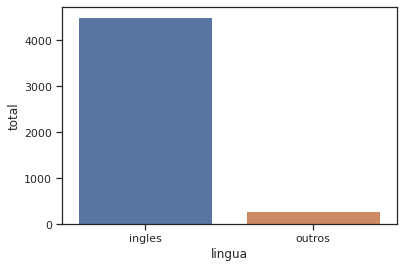

In [169]:
#plotando o dataframe dados

sns.barplot(x="lingua", y="total", data = dados)

# Com esse gráfico, podemos inferir que temos muito mais filmes com o idioma   
# em inglês do que os outros idiomas                                           
#------------------------------
# Resumidamente, é muito mais fácil de contar que tem mais filmes com o idioma 
# em inglês quando é comparado o inglês com todas as outras línguas juntas, do 
# que utilizar a comparação separada (igual estava acontecendo com os plots    
# anteiores)                                                                   

([<matplotlib.patches.Wedge at 0x7fef3e515e50>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

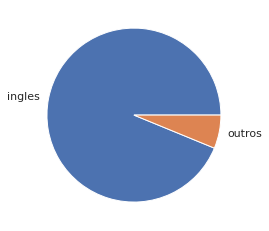

In [170]:
# Plotando o gráfico anterior em gráfico de pizza
plt.pie(dados["total"], labels = dados["lingua"])

# É perceptível que tem inglês tem mais filmes do que outros
# porém, não tem como fazer proporções, só é perceptível que tem mais
# sem que seja refinado

In [171]:
# Filtrnado somente as linhas com os filmes DIFERENTES de inglês
# Filtrando por original_language e fazendo a contagem
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_de_outros_filmes

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ta     2
ro     2
ar     2
cs     2
id     2
xx     1
vi     1
el     1
ps     1
nb     1
is     1
hu     1
te     1
tr     1
no     1
af     1
pl     1
sl     1
ky     1
Name: original_language, dtype: int64

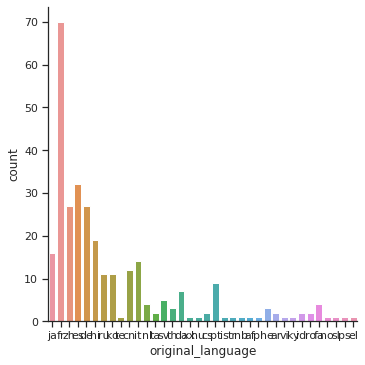

In [172]:
# Serie com os files que sejam DIFERENTE de inglês
filmes_sem_linguas_original_em_ingles = tmdb.query("original_language != 'en'")

#Plotando (catplot) dos filmes sem ingles
sns.catplot(x = "original_language", kind="count", data = filmes_sem_linguas_original_em_ingles)

# 5. Continuando com visualização

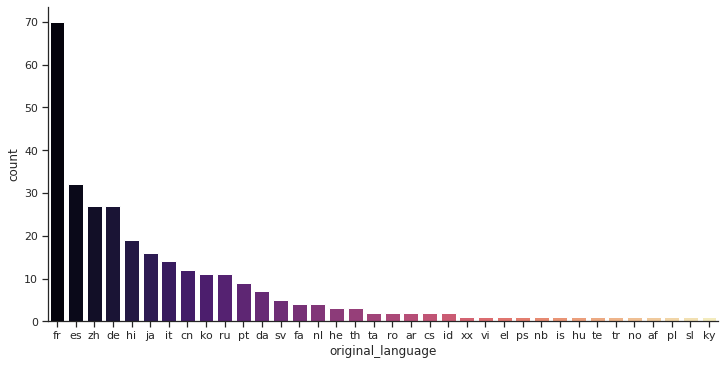

In [173]:
# Serie com os files que sejam DIFERENTE de inglês
filmes_sem_linguas_original_em_ingles = tmdb.query("original_language != 'en'")


# Plotando (catplot) dos filmes sem ingles em formato retangular e ordenado
# utilizando o aspect = 2 e order pelo index dos valores
sns.catplot(x = "original_language", kind="count", 
            data = filmes_sem_linguas_original_em_ingles,
            aspect= 2, 
            palette="magma",
            order=total_por_lingua_de_outros_filmes.index)

Um pouco sobre os gráficos lineares

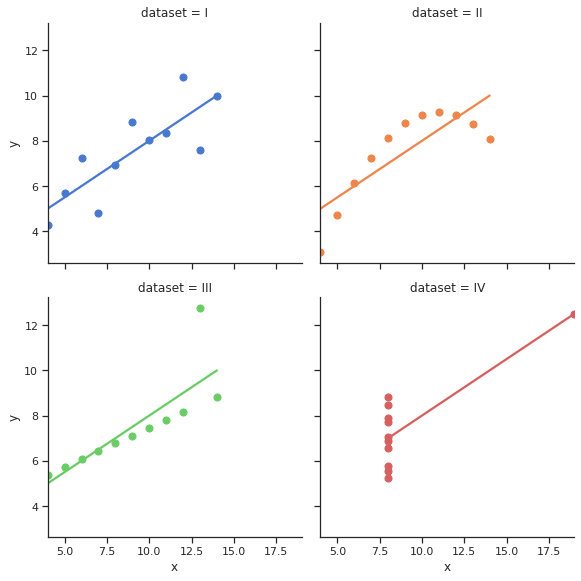

In [174]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

# 6. Dados e Estatística

In [175]:
# Visualizando os 2 primeiros filmes disponíveis
filmes.head(2)

,filmesId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [176]:
# Filtrando as notas dos filmes
notas_do_toy_story = notas.query("filmeId==1")
notas_do_jumanji = notas.query("filmeId==2")
print(len(notas_do_toy_story), len(notas_do_jumanji))

215 110


In [177]:
# Exibindo a MÉDIA das notas do Toy Story e Jumanji
print("Nota média do Toy Story %.2f" % notas_do_toy_story.nota.mean())
print("Nota média do Jumanji %.2f" % notas_do_jumanji.nota.mean())

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43


In [178]:
# Exibindo a MEDIANA das notas do Toy Story e Jumanji
# ---------
# A mediana irá imprimir as notas 4 e 3.5, que separa 50% para cima
# e 50% para baixo
print("Nota mediana do Toy Story %.2f" % notas_do_toy_story.nota.median())
print("Nota mediana do Jumanji %.2f" % notas_do_jumanji.nota.median())

Nota mediana do Toy Story 4.00
Nota mediana do Jumanji 3.50


In [179]:
# importando a biblioteca Numpy
import numpy as np

#criando um array numpy 
filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10)) #notas mais centralizadas
filme2 = np.append(np.array([5] * 10), np.array([1] * 10)) # notas mais espalhadas

In [180]:
# Exibindo a média do filme 1 e 2 
print(filme1.mean(), filme2.mean())

# Exibindo a mediana do array do numpy
print(np.median(filme1), np.median(filme2))


# Mesmo se utilizar a média ou a mediana, ambas estão trazendo a tendência da
# mesma informação desse conjunto de dados. Porém existe a diferença entre 
# [2.5, 3.5] e [5, 1] -> Talvez seja interessante não só analisar o número pontual
# mas também visualizar a distribuição (boxplot, histogramas, distplot)

3.0 3.0
3.0 3.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


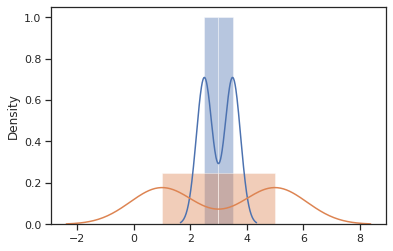

In [181]:
# Distplot
sns.distplot(filme1)
sns.distplot(filme2)

#obs: por padrão não fica bonito utilizar o distplot para essa sem que faça tratamento da visualização

In [182]:
print(filme1.mean(), filme2.mean()) #média
print(np.std(filme1), np.std(filme2)) # desvio padrão
print(np.median(filme1), np.median(filme2)) #mediana

3.0 3.0
0.5 2.0
3.0 3.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

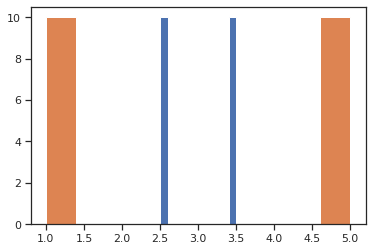

In [183]:
# Histograma
plt.hist(filme1)
plt.hist(filme2)

{'boxes': [<matplotlib.lines.Line2D at 0x7fef52bc1890>,
 'caps': [<matplotlib.lines.Line2D at 0x7fef52bbf850>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fef52bb7890>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fef52bb7350>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fef52bc1d90>,
  <matplotlib.lines.Line2D at 0x7fef52c6c7d0>]}

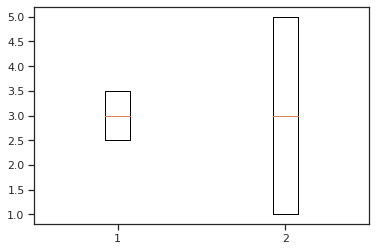

In [184]:
#Boxplot
plt.boxplot([filme1, filme2])

#Obs: a mediana está no mesmo ponto (linha laranja), porém
# a distribuição dos dados dos filmes estão diferentes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


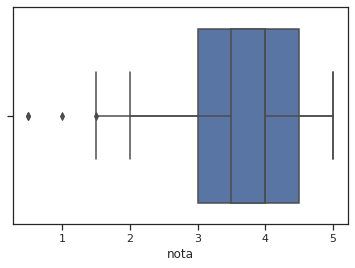

In [185]:
#BOXPLOT do TOY STORY E JUMANJI PELO SEABORN
sns.boxplot(notas_do_toy_story.nota)
sns.boxplot(notas_do_jumanji.nota)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


{'boxes': [<matplotlib.lines.Line2D at 0x7fef52c81e50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fef52c76e90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fef52a27ed0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fef52a27990>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fef52c76410>,
  <matplotlib.lines.Line2D at 0x7fef52a22e50>]}

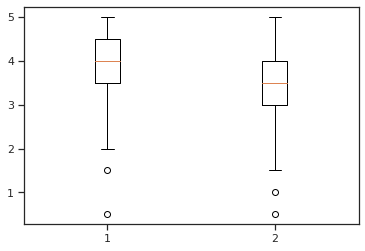

In [186]:
#BOXPLOT do TOY STORY E JUMANJI PELO PLT
plt.boxplot([notas_do_toy_story.nota, notas_do_jumanji.nota])

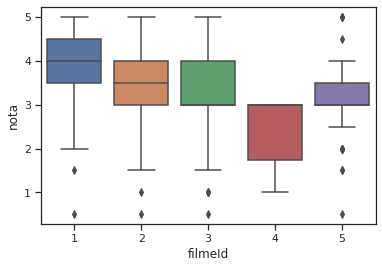

In [187]:
#Exibindo boxplot dos filmes 1,2,3,4 e 5
sns.boxplot(x = "filmeId", y = "nota", data = notas.query("filmeId in [1,2,3,4,5]"))

Desvio padrão std pandas
fonte; https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html

In [188]:
# Desvio padrão  (std) 
# Descrever quanto o gráfico 
print(notas_do_toy_story.nota.std(), notas_do_jumanji.nota.std())

0.8348591407114045 0.8817134921476455
